# Procesamiento de Audio en Python

En esta lección aprenderemos algunos conceptos básicos de manejo de audio en Python. Haremos las siguientes cosas:

1. Cargar un archivo wav
1. Visualizar la forma de onda
1. Crear un widget para escuchar un audio
1. Generar un espectrograma y visualizarlo con LibROSA
1. Transformar nuestra forma de onda
1. Sintetizar formas de onda sencillas

Usaremos las librerías libROSA, matplotlib, numpy, scipy y IPython. 

Todas se incluyen con la instalación de Anaconda excepto libROSA pero se puede instalar igual que cualquier librería de pip con anaconda escribiendo:

`pip install librosa`

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import librosa
import librosa.display

from IPython.display import Audio

La función `librosa.load()` nos ayuda a cargar un archivo de audio de manera muy sencilla. Por default, librosa genera un archivo mono muestreado a 22100 Hz. Para evitar esto podemos escribir como argumentos `sr=None` y `mono=False`.

### 1. Cargar un Archivo WAV

In [12]:
y, sr = librosa.load('./sounds/gtr_jazz.wav', sr = None, mono=False)

Ahora tenemos dos variables nuevas. La variable `y` es un arreglo numpy que contiene los dos canales del audio de entrada. La variable `sr` contiene el <em>Sample Rate</em> o Frecuencia de Muestreo con el que fue cargada la señal.

Imprimimos algunos datos sobre nuestra forma de onda

In [35]:
channels, total_samples = y.shape

print("La Frecuencia de muestreo es ",sr)
print("La señal tiene {} canales".format(channels))
print("\nLa señal tiene {} muestras".format(total_samples))
print("La señal dura {:0.4f} segundos".format(total_samples/sr))
print("\nEl valor máximo es {:0.4f}".format(np.max(y)))
print("El valor mínimo es {:0.4f}".format(np.min(y)))

La Frecuencia de muestreo es  48000
La señal tiene 2 canales

La señal tiene 455887 muestras
La señal dura 9.4976 segundos

El valor máximo es 0.8943
El valor mínimo es -0.6989


Podemos también imprimir algunos valores de `y`

In [18]:
y[1,22100:22120]

array([-0.00991821, -0.01721191, -0.02410889, -0.02999878, -0.03369141,
       -0.03598022, -0.03582764, -0.03451538, -0.02972412, -0.02371216,
       -0.01553345, -0.00662231,  0.00442505,  0.01403809,  0.02603149,
        0.03640747,  0.04641724,  0.05529785,  0.06161499,  0.06619263],
      dtype=float32)

Librosa también tiene la función `librosa.display.waveplot()` que grafica el contorno de una forma de onda de manera muy sencilla. Los métodos de `librosa.display` están creados sobre `matplotlib` así que podemos usar herramientas de `matplotlib` para editar el formato del gráfico

### 2. Visualizar la forma de onda

Text(0.5, 1.0, 'Right Channel')

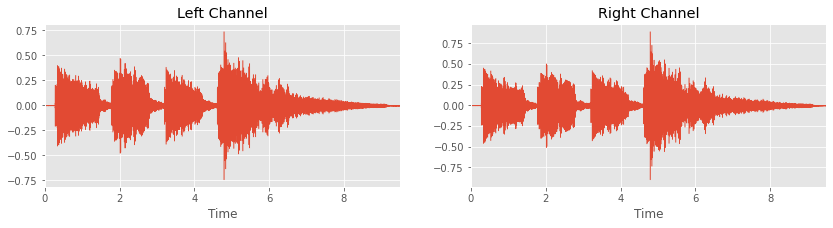

In [13]:
plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
librosa.display.waveplot(y[0],sr=sr)
plt.title('Left Channel')
plt.subplot(1,2,2)
librosa.display.waveplot(y[1],sr=sr)
plt.title('Right Channel')

Al igual que hacer rato, podemos graficar solo un segmento de `y`. Pero para esto es más conveniente usar `plt.plot()` Grafiquemos 500 muestras,

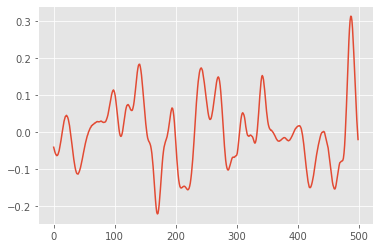

In [41]:
plt.plot(y[0,22100:22600])

### 3. Crear un widget para escuchar el audio

Lo siguiente que podemos hacer, es usar la función `Audio()` de `IPython.display` para crear un pequeño widget que nos permite escuchar el audio.

In [31]:
Audio(data = y, rate = sr)

### 4. Generar un espectograma y visualizarlo con libROSA

Librosa hace muy sencillo generar un espectrograma con una Transformada en Tiempo Corto de Fourier. Solo necesitamos usar la función `stft()`.

In [45]:
s_left = librosa.core.stft(y = y[0])

La Transformada de Fourier regresa valores complejos así que antes de visualizarlo tenemos que encontrar las magnitudes de los valores usando `np.abs()` y luego tenemos que aplicar una escala logarítmica para poder visualizar mejor.

In [51]:
s_left = np.abs(s_left)
s_left = librosa.amplitude_to_db(s_left)

Ahora si podemos visualizar usando la función, `librosa.display.specshow()`.

Hay varios argumentos que podemos proporcionar a esta función para cambiar un poco la imagen generada.

1. `sr`: hay que proporcionar el sample rate de nuestra señal para que la función sepa cuánto dura la señal y pueda crear el eje de tiempo correctamente.
1. `x_axis`: con este argumento le decimos a la función que grafique el tiempo en el eje x.
1. `y_axis`: similar a `x_axis` pero podemos especificar el tipo de escala que quiero para la visualización.

Text(0.5, 1.0, 'Espectrograma con escala de Frecuencias Logarítmica')

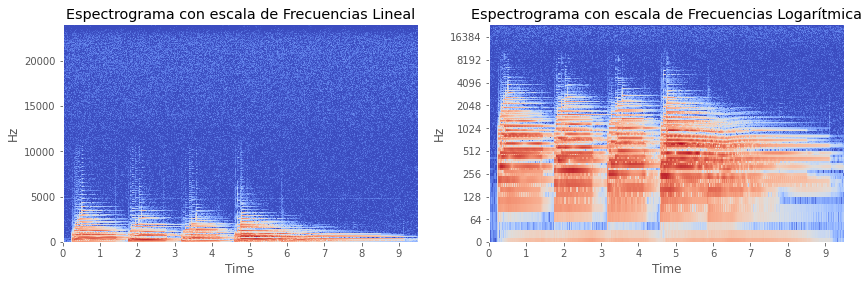

In [63]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
librosa.display.specshow(s_left,
                         sr=sr,
                         x_axis='time',
                         y_axis='linear')
plt.title('Espectrograma con escala de Frecuencias Lineal')

plt.subplot(1,2,2)
librosa.display.specshow(s_left,
                         sr=sr,
                         x_axis='time',
                         y_axis='log')
plt.title('Espectrograma con escala de Frecuencias Logarítmica')

### 5. Transformar la forma de onda

Existen muchas posibilidades para procesar la onda, empecemos con algo muy sencillo y de ahí intentemos cosas un poco más avanzadas.

#### 5.1 Cambio de amplitud

Una de las cosas más sencillas de hacer es escalar (cambiar la amplitud) de la forma de onda. Lo único que necesito hacer es multiplicar la señal por un valor.

In [ ]:
y_half = y*0.5

Veamos el resultado

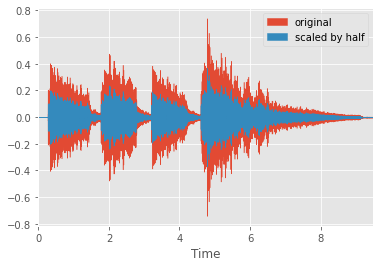

In [85]:
librosa.display.waveplot(y[0],sr=sr,label='original')
librosa.display.waveplot(y_half[0],sr=sr,label='scaled by half')
plt.legend()

#### 5.2.1 Delay Sencillo

Para hacer un Delay sencillo solo necesitamos copiar una señal, retrasarla un poco y de preferencia escalarla como hicimos en el paso anterior. La función shift toma una forma de onda y la atrasa `n` muestra hacia la derecha.

In [122]:
def shift(seq, n=0):
    a = n % len(seq)
    return np.concatenate((np.zeros((n)),seq[:-a]))

Usemos la función shift para mover la onda escalada de la sección anterior 10000 muestras

In [123]:
y_half_shifted = shift(y_half[0], n = 10000)

Visualicemos las ondas

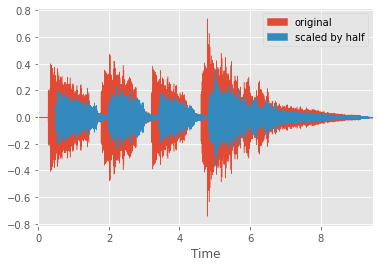

In [124]:
librosa.display.waveplot(y[0],sr=sr,label='original')
librosa.display.waveplot(y_half_shifted,sr=sr,label='scaled by half')
plt.legend()

Y ahora las podemos sumar para generar la onda final.

In [125]:
y_delay = y[0] + y_half_shifted

Escuchemos el resultado,

In [126]:
Audio(data = y_delay, rate = sr)

#### 5.2.2 Un delay un poco más avanzado

Hagamos un delay un poco mejor que nos permita hacer lo siguiente:

<ul>
    <li>Definir el tiempo de delay en milisegundos en lugar de muestras</li>
    <li>Definir el número de repeticiones</li>
    <li>Definir qué tan rápido se desvanece la señal</li>
    <li>Definir el delay como una función que haga fácil aplicar el delay</li>
</ul>

Para el primer punto, vale la pena crear una función que transforme los milisegundos a muestras, eso se puede hacer sencillamente con la función,

$$\text{samples} = \frac{ms}{1000}\cdot sr$$

In [127]:
def ms_to_samples(ms,sr):
    return int(ms/1000*sr)

Ponemos aquí otra vez la definición de la función shift para no perdernos.

In [132]:
def shift(seq, n=0):
    a = n % len(seq)
    return np.concatenate((np.zeros((n)),seq[:-a]))

Como podrás ver, nuestro delay es muy sencillo de implementar, la función `delay()` toma todos los parámetros que discutimos anteriormente y hace lo siguiente,

1. Transforma los milisegundos a muestras, ya que nosotros necesitamos especificar muestras cuando usamos la función shift.
1. Hace un ciclo `for` que se va a repetir cuantas veces lo dice mi variable `reps`.
1. La primera vez calculamos el delay en base a la onda original. Para las demás iteraciones, escalamos y transladamos los delays.
1. Sumamos a la señal la nueva repetición.

In [143]:
def delay(y, ms, reps, scaling, sr):
    samples = ms_to_samples(ms, sr)
        
    for i in range(reps):
        if i == 0:
            y_del = scaling*shift(y,samples)
        else:
            y_del = scaling*shift(y_del,samples)
            
        y = y + y_del
        
    return y

El paso anterior es la definición de la función, en este paso aplicamos el delay con,

<ul>
    <li>250 milisegundos</li>
    <li>5 repeticiones</li>
    <li>Cada repitición la amplitud es la mitad</li>
</ul>

In [152]:
y_delay = delay(y=y[0], ms=250, reps=5, scaling=0.5, sr=sr)

Podemos visualizar y escuchar el resultado

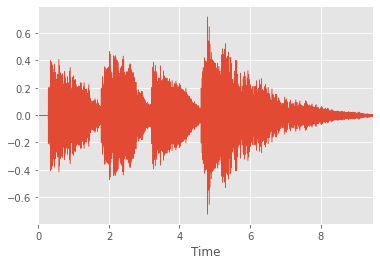

In [153]:
librosa.display.waveplot(y_delay,sr=sr)
Audio(data=y_delay,rate=sr)

#### 5.3 Reverb

Existen muchos algoritmos de Reverb pero uno de los más típicos, y uno que podemos implementar fácilmente gracias a scipy es un reverb con una respuesta al impulso.

In [154]:
from scipy.signal import fftconvolve

Necesitamos importar una respuesta al impulso, ya hemos incluido algunas en el folder, `sounds`.

In [193]:
ir, sr = librosa.load('./sounds/ir2.wav',sr = sr)

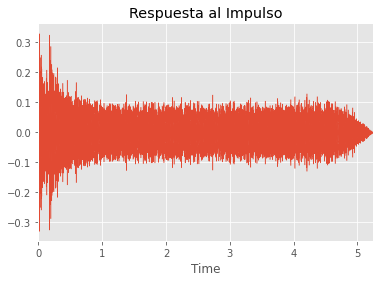

In [198]:
librosa.display.waveplot(y=ir,sr=sr)
plt.title('Respuesta al Impulso')

Audio(data = ir, rate = sr)

Podemos hacer el cálculo en sólo una línea gracias a scipy, la convolución junta los espectros de ambas señales y así genera el efecto de reverb cuando la segunda es una respuesta al impulso.

In [199]:
y_wet = fftconvolve(y[0],ir)

In [200]:
Audio(data = y_wet, rate = sr)

Sin embargo un buen más avanzado toma una señal <em>wet</em> y una señal <em>dry</em> y las combina. Hay que considerar que la nueva señal es más larga debido a la cola del reverb así que necesitamos hacer una nueva señal, y_dry que sea de la misma longitud que la onda wet.

In [208]:
# Crear un arreglo con 0's del tamaño de y_wet
y_dry = np.zeros(y_wet.shape)

# En los primeros valores de y_dry, colocar y_wet
y_dry[:len(y[0])] = y[0]

# Sumamos 90% de la señal dry y 10% de la señal wet
y_reverb = 0.9*y_dry + 0.1*y_wet

In [209]:
Audio(data = y_reverb, rate = sr)

### 6. Síntesis de Formas de Onda Sencillas

Por último, veamos como podemos sintetizar nuestras propias ondas de audio.

Hagamos un arreglo con muestras correspondientes a 2 segundos

In [225]:
freq = 440
n = np.linspace(0,sr*2,sr*2)

`n` es un arreglo de `48,000*2` que tiene los índices de muestras para 2 segundos

#### 6.1 Onda senoidal/Tono Simple

Y ahora creemos nuestra forma de onda con la función,

$$x(n) = A*sin(2\pi\cdot f \cdot \frac{n}{sr})$$

Donde $f$ es la frecuencia, $n$ la muestra y $sr$ la frecuencia de muestreo.

In [231]:
y_sin = 0.3*np.sin(2*np.pi*freq*t/sr)

In [232]:
Audio(data = y_sin,rate = sr)

No sirve de mucho graficar toda la señal pero podemos visualizar un fragmento pequeño,

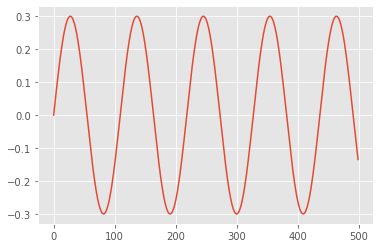

In [237]:
plt.plot(y_sin[:500])

#### 6.2 Onda cuadrada

Una onda cuadrada se consigue al sumar los harmónicos impares divididos entre su índice es decir,

$$\text{square_wave}[t] = x[t] + \frac{1}{3}x[3*t] + \frac{1}{5}x[5*t] + \dots$$

In [258]:
y_square = np.zeros_like(y_sin)

for i in range(100):
    n = 2*i+1
    y_square += (1/n)*np.sin(2*np.pi*n*freq*t/sr)

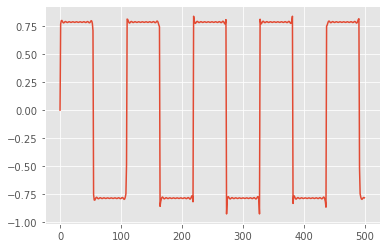

In [259]:
plt.plot(y_square[:500])

In [260]:
Audio(data = 0.2*y_square, rate = sr)

#### 6.4 Onda Triangular

Una unda triangular se aproxima al hacer la siguiente sumatoria,

$$\text{triangle_wave}[t] = sin[t] - \frac{1}{3^2}sin[3*t] + \frac{1}{5^2}sin[5*t] $$

In [265]:
y_triangle = np.zeros_like(y_sin)

for i in range(100):
    n = 2*i+1
    
    y_triangle += ((-1)**i)*(1/n**2)*np.sin(2*np.pi*n*freq*t/sr)

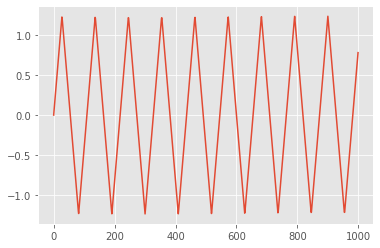

In [266]:
plt.plot(y_triangle[:1000])

In [267]:
Audio(data= 0.2*y_triangle, rate = sr)